# Comparing with other more sophisticated methods

In [1]:
#Omid55
import requests
import pandas as pd
import pickle as pk
import csv
import time
import numpy as np
import random
from collections import defaultdict
import seaborn as sns
import matplotlib.pylab as plt
from scipy.sparse import csr_matrix
import networkx as nx
import glob
import networkx
import scipy
import classification_pipeline as pi
% matplotlib inline

In [2]:
file_names = ['DATA_2016_Nodes.csv', 'DATA_2016_Networks.csv', 'DATA_2016_Nodes+Networks.csv']

In [12]:
pi = reload(pi)
acc_dfs = []
for fn in file_names:
    acc_dfs.append([pi.run_classifiers(fn, with_figure=False)])
    print('\n############################################################################\n')

Starting ...
Loaded data size:  (577, 17)
Swapping  8.0 : 16.0  with 0 : 8.0  ...
Dataset size:  (577, 17)
                                classifier  test acc  train acc
0                                      KNN     50.43      63.16
1          Quadratic Discriminant Analysis     54.59      65.59
2                            Decision Tree     54.81      71.81
3             Linear Discriminant Analysis     54.77      58.17
4                      SVM with RBF kernel     58.25      68.53
5                              Naive Bayes     54.76      58.29
6                               Linear SVM     54.77      58.02
7                            Random Forest     54.26     100.00
8   Stochastic Gradient Descent Classifier     51.81      52.01
9                                 AdaBoost     55.30      76.55
10                     Logistic Regression     55.28      57.92
11                         Dummy (Uniform)     49.38      49.62

############################################################

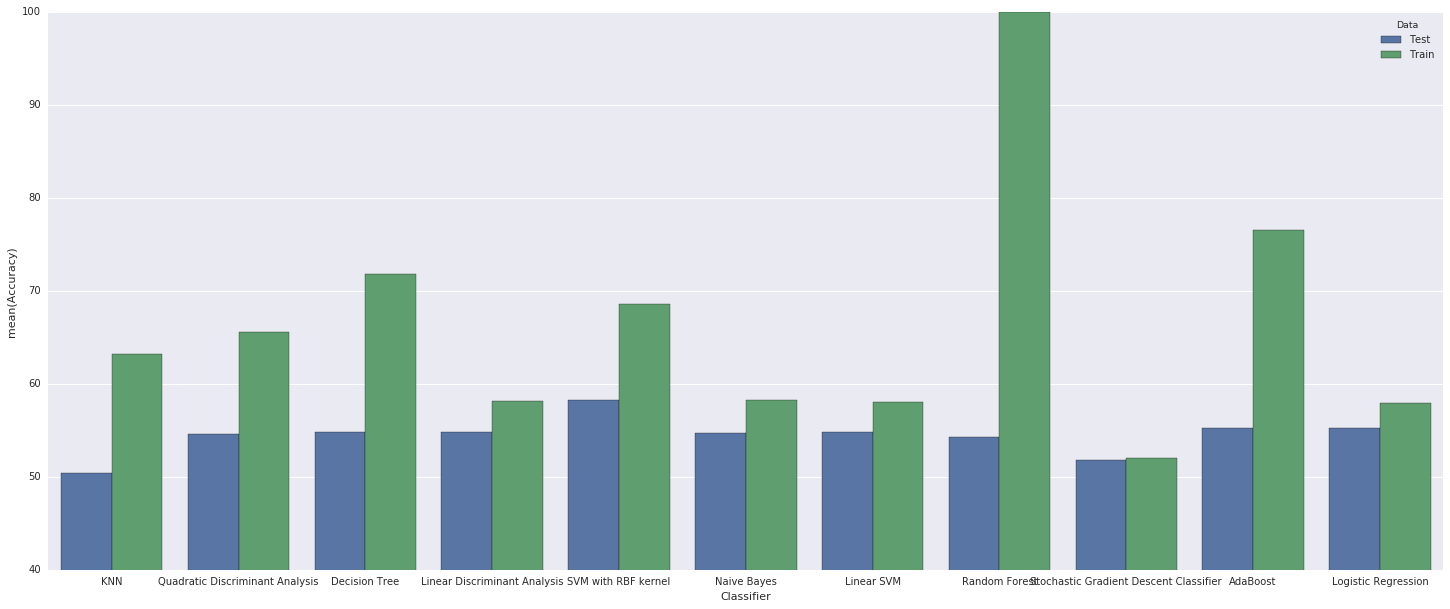

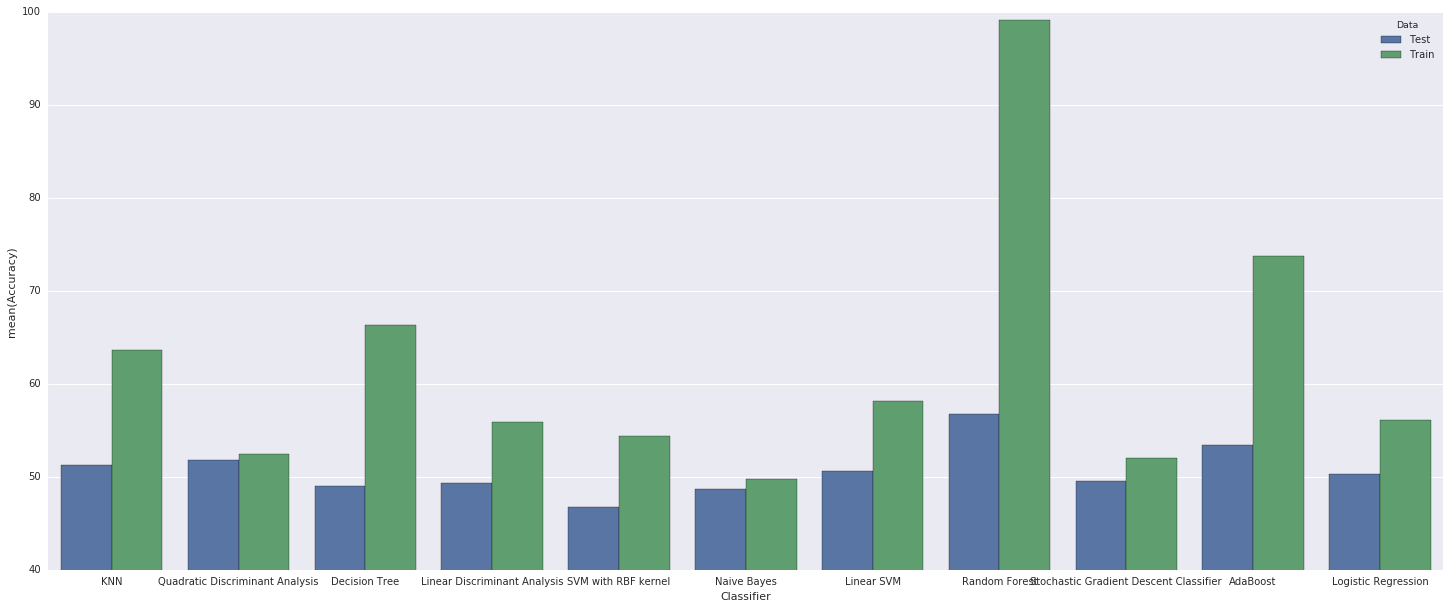

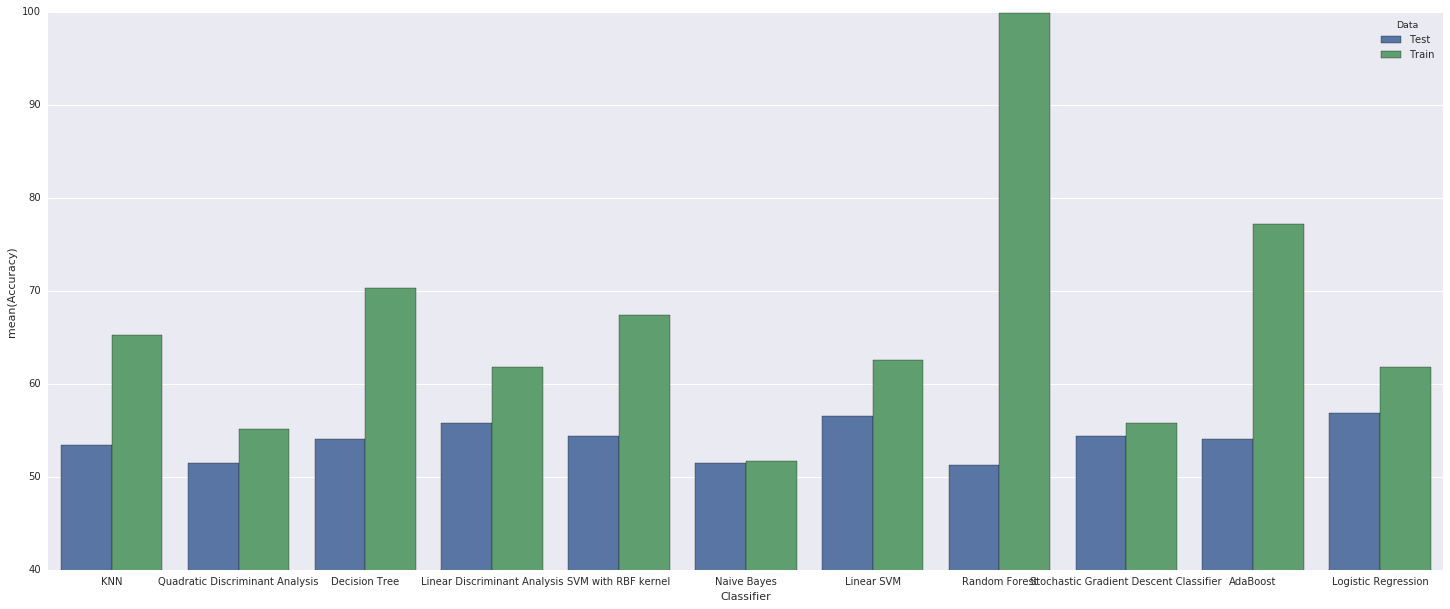

In [80]:
c = 0
for a in acc_dfs:
    c = c + 1
    ress = []
    for i in range(len(a[0])-1):
        ress.append([a[0]['classifier'][i], a[0]['test acc'][i], 'Test'])
        ress.append([a[0]['classifier'][i], a[0]['train acc'][i], 'Train'])
    res_df = pd.DataFrame(data=ress, columns=['Classifier', 'Accuracy', 'Data'])

    sns.set(rc={"figure.figsize": (25, 10)})
    ax = sns.barplot(x="Classifier", y="Accuracy", hue="Data", data=res_df)
    plt.ylim(40, 100);
    plt.savefig('Fig'+str(c)+'.png')
    plt.figure();